**Bank Loan Defaulter Prediction (Hackathon)**

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
path_train = 'Files/train.csv'
path_test = 'Files/test.csv'
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [34]:
df_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [35]:
df_train.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

The data set is complete without the missing values, but the Employment Duration and Home Ownership features are reversed

In [37]:
copy = df_train['Employment Duration'].copy()
df_train['Employment Duration'] = df_train['Home Ownership']
df_train['Home Ownership'] = copy

copy = df_test['Employment Duration'].copy()
df_test['Employment Duration'] = df_test['Home Ownership']
df_test['Home Ownership'] = copy

| Column | Description |
|--------|-------------|
| **ID** | Unique ID of representative. |
| **Loan Amount** | Loan amount applied. |
| **Funded Amount** | Loan amount funded. |
| **Funded Amount Investor** | Loan amount approved by the investors. |
| **Term** | Term of loan (in months). |
| **Batch Enrolled** | Batch numbers to representatives. |
| **Interest Rate** | Interest rate (%) on loan. |
| **Grade** | Grade by the bank. |
| **Sub Grade** | Sub-grade by the bank. |
| **Employment Duration** | Duration. |
| **Home Ownership** | Owner ship of home. |
| **Verification Status** | Income verification by the bank. |
| **Payment Plan** | If any payment plan has started against loan. |
| **Loan Title** | Loan title provided. |
| **Debit to Income** | Ratio of representative's total monthly debt repayment divided by self reported monthly income excluding. |
| **Delinquency - two years** | Number of 30+ days delinquency in past 2 years. |
| **Inquires - six months** | Total number of inquiries in last 6 months. |
| **Open Account** | Number of open credit line in representative's credit line. |
| **Public Record** | Number of derogatory public records. |
| **Revolving Balance** | Total credit revolving balance. |
| **Revolving Utilities** | Amount of credit a representative is using relative to revolving_balance. |
| **Total Accounts** | Total number of credit lines available in representatives credit line. |
| **Initial List Status** | Unique listing status of the loan - W(Waiting), F(Forwarded). |
| **Total Received Interest** | Total interest received till date. |
| **Total Received Late Fee** | Total late fee received till date. |
| **Recoveries** | Post charge off gross recovery. |
| **Collection Recovery Fee** | Post charge off collection fee. |
| **Collection 12 months Medical** | Total collections in last 12 months excluding medical collections. |
| **Application Type** | Indicates when the representative is an individual or joint. |
| **Last week Pay** | Indicates how long (in weeks) a representative has paid EMI after batch enrolled. |
| **Accounts Delinquent** | Number of accounts on which the representative is delinquent. |
| **Total Collection Amount** | Total current balance from all accounts. |
| **Total Current Balance** | Total current balance from all accounts. |
| **Total Revolving Credit Limit** | Total revolving credit limit. |
| **Loan Status** | The target feature - 1 = Defaulter, 0 = Non Defaulters. |

C:\Users\Fernando Luiz\AppData\Local\Temp\ipykernel_2000\2011808921.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relation = df_train.groupby(binned)[target].mean()
C:\Users\Fernando Luiz\AppData\Local\Temp\ipykernel_2000\2011808921.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relation = df_train.groupby(binned)[target].mean()
C:\Users\Fernando Luiz\AppData\Local\Temp\ipykernel_2000\2011808921.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fu

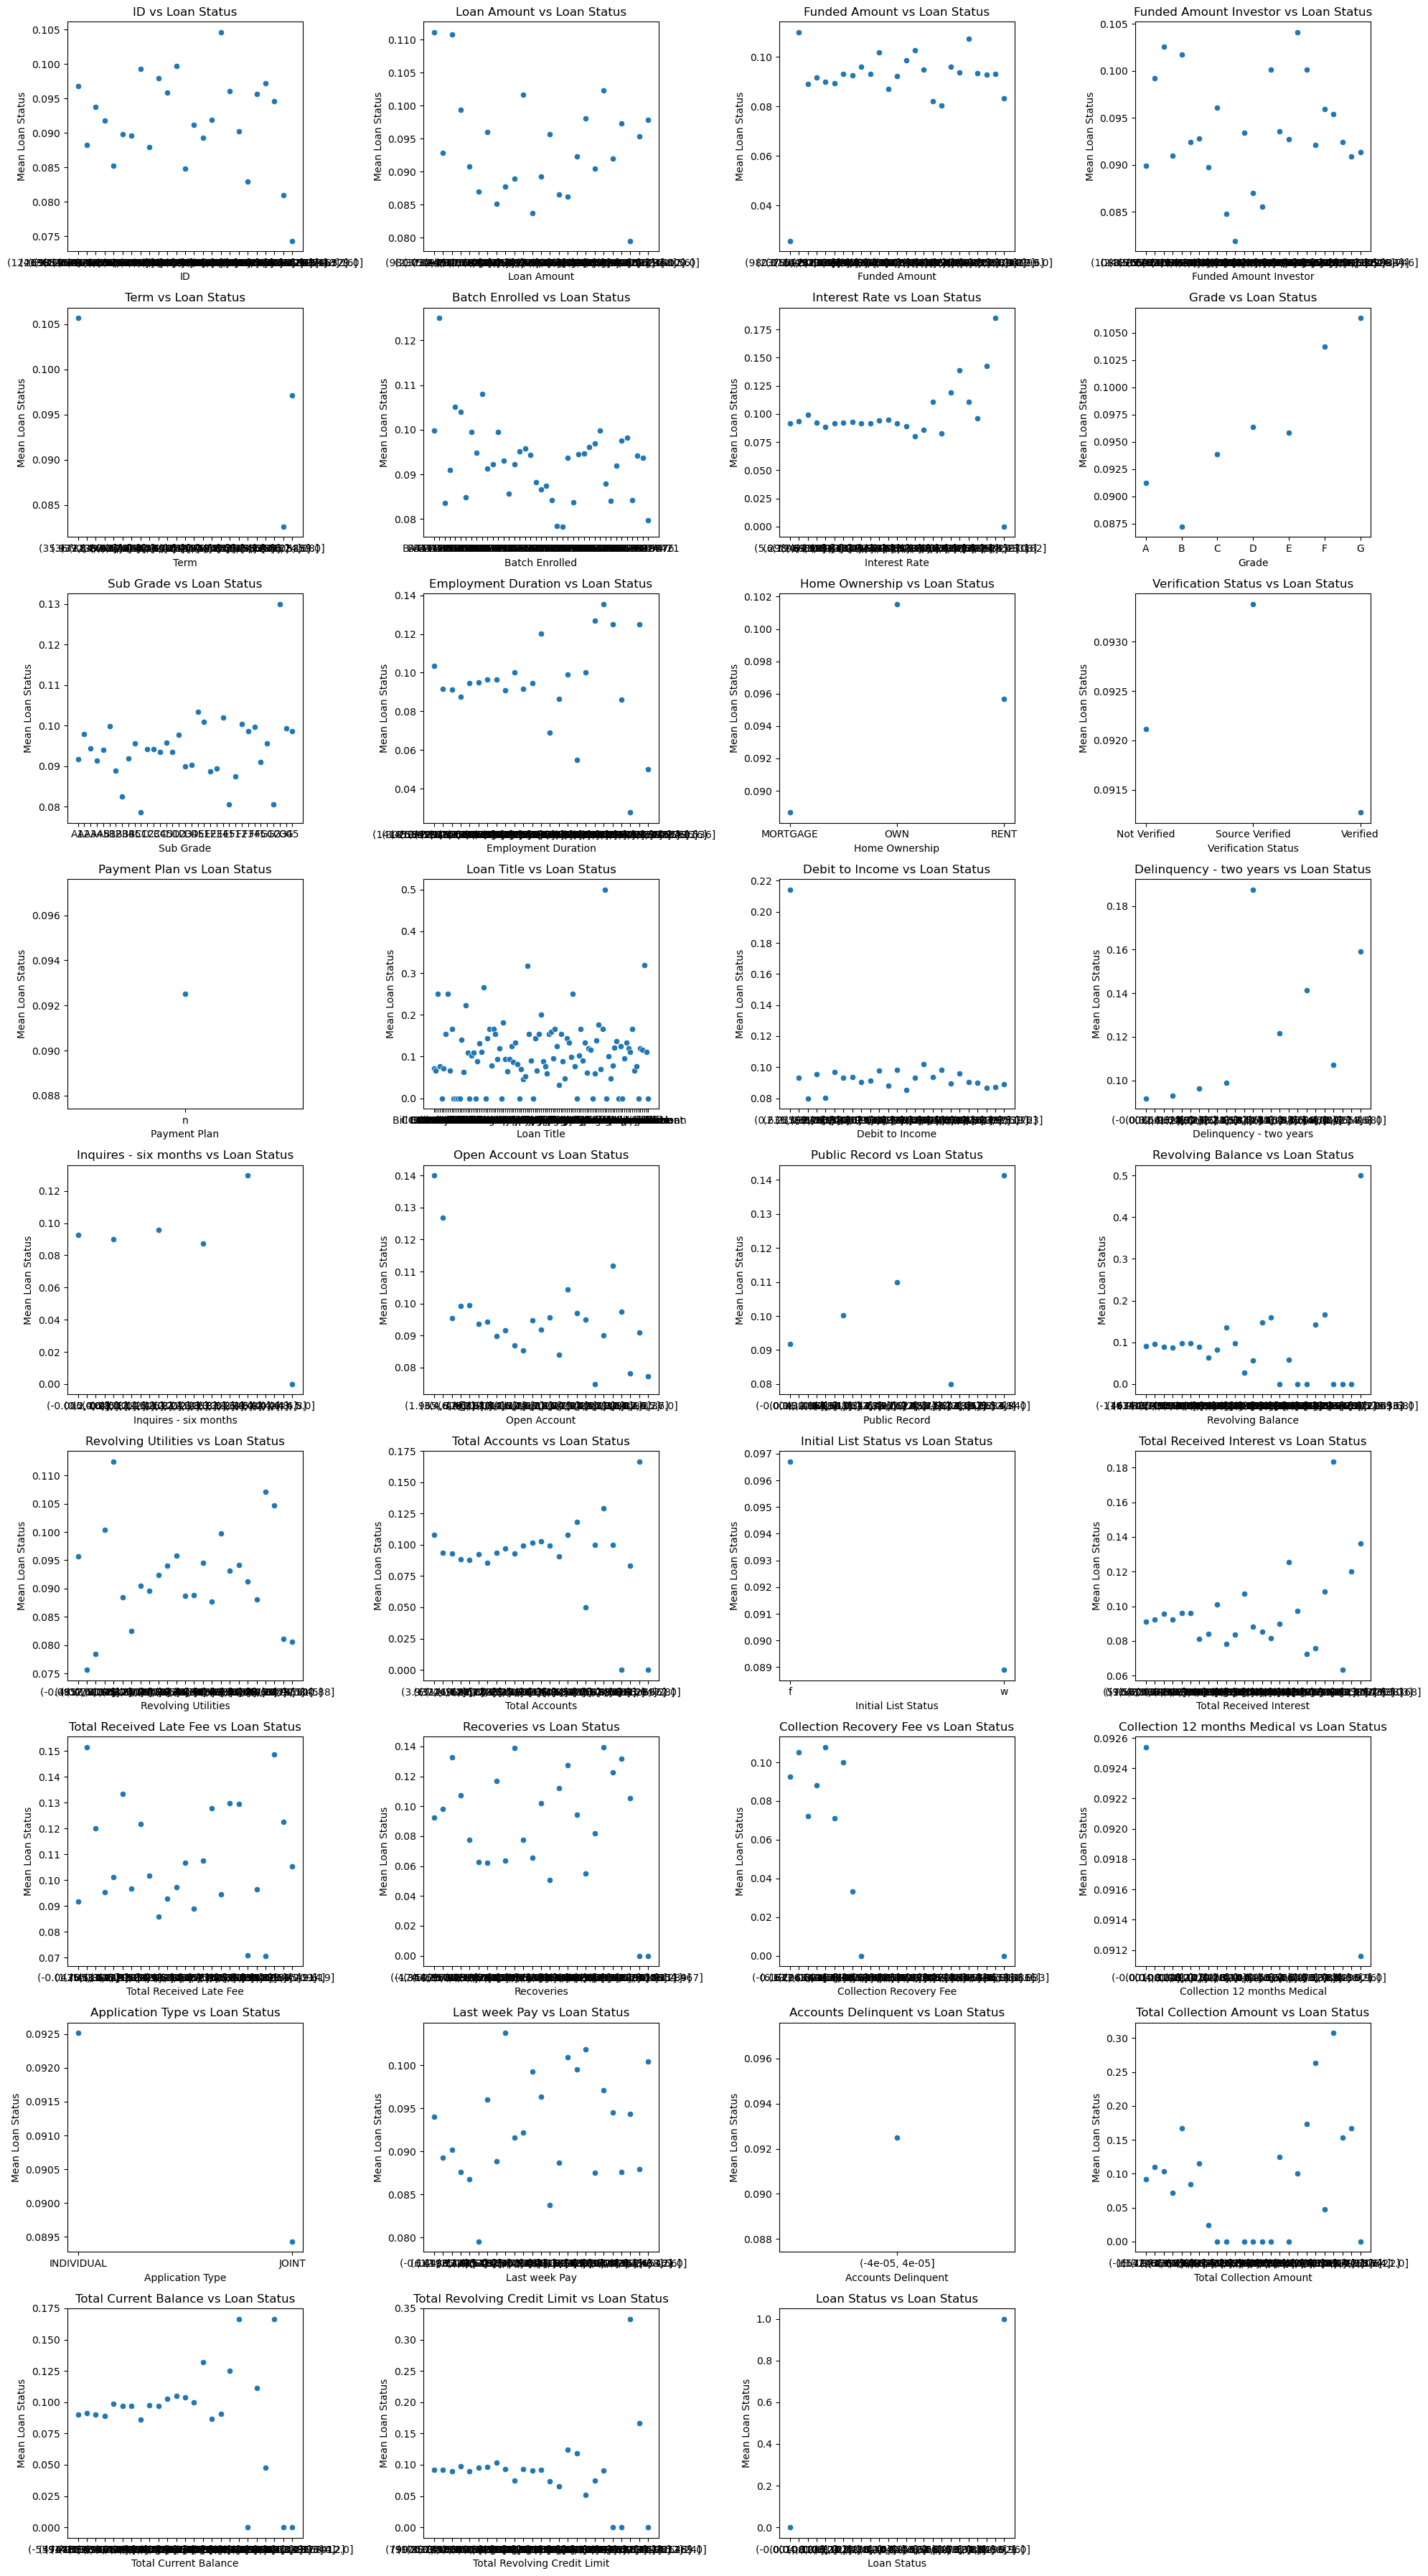

In [38]:
target = 'Loan Status'
features = df_train.columns

bins = 25
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.flatten()

for i, feature in enumerate(features):   
    if pd.api.types.is_numeric_dtype(df_train[feature]): 
        # Quantitative data      
        binned = pd.cut(df_train[feature], bins=bins)
        relation = df_train.groupby(binned)[target].mean()
        
        sns.scatterplot(x=relation.index.astype(str), y=relation.values, ax=axs[i])
    else:
        # Categorical data
        relation = df_train.groupby(feature)[target].mean()
        sns.scatterplot(x=relation.index.astype(str), y=relation.values, ax=axs[i])

    axs[i].set_title(f"{feature} vs {target}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel(f"Mean {target}")

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

By analyzing the data, we can eliminate the ID and BATCH ENROLLED columns, key values and PAYMENT PLAN and ACCOUNTS DELIQUENT, which have a unique values.

In [39]:
features_drop = ['ID', 'Batch Enrolled', 'Payment Plan', 'Accounts Delinquent']
df_train.drop(features_drop, axis='columns', inplace=True)
df_test.drop(features_drop, axis='columns', inplace=True)

       Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0            10000          32236             12329.36286    59   
1             3609          11940             12191.99692    59   
2            28276           9311             21603.22455    59   
3            11170           6954             17877.15585    59   
4            16890          13226             13539.92667    59   
...            ...            ...                     ...   ...   
67458        13601           6848             13175.28583    59   
67459         8323          11046             15637.46301    59   
67460        15897          32921             12329.45775    59   
67461        16567           4975             21353.68465    59   
67462        15353          29875             14207.44860    59   

       Interest Rate  Employment Duration  Debit to Income  \
0          11.135007         176346.62670        16.284758   
1          12.237563          39833.92100        15.412409   
2        

C:\Users\Fernando Luiz\AppData\Local\Temp\ipykernel_2000\2519438541.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relation = df_train.groupby(binned)[target].mean().reset_index(drop=True)
C:\Users\Fernando Luiz\AppData\Local\Temp\ipykernel_2000\2519438541.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relation = df_train.groupby(binned)[target].mean().reset_index(drop=True)
C:\Users\Fernando Luiz\AppData\Local\Temp\ipykernel_2000\2519438541.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curren

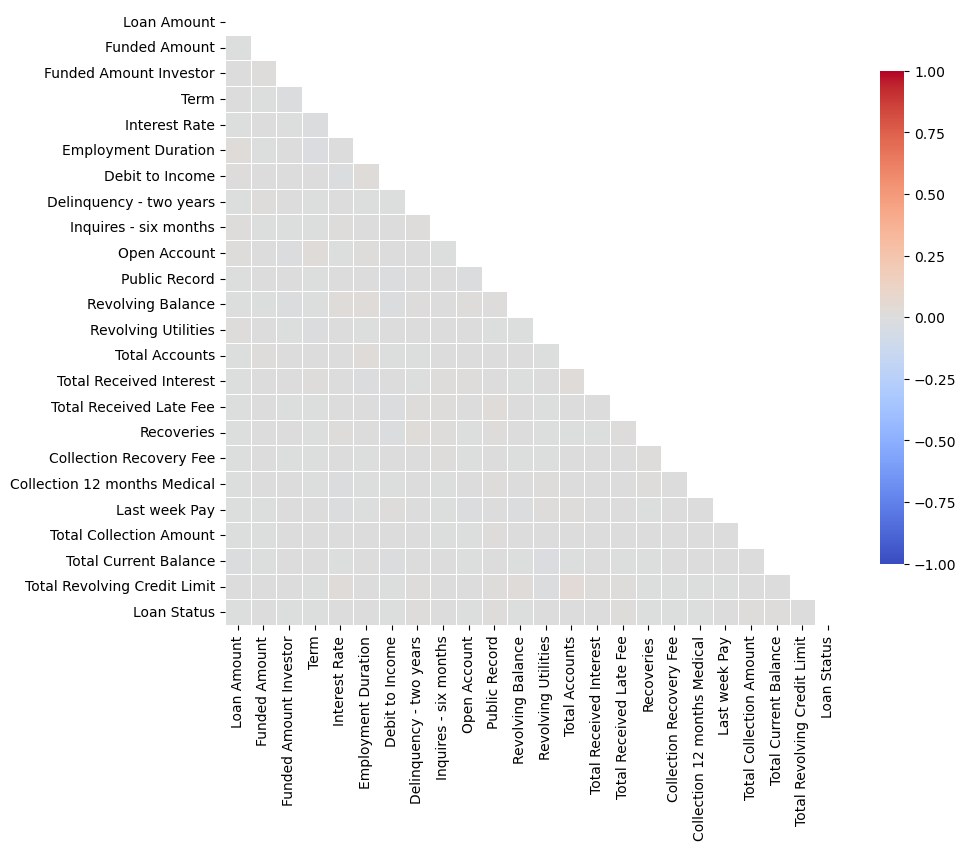

In [40]:
numeric_features = df_train.select_dtypes(include='number')
print(numeric_features)

df_binned_means = pd.DataFrame()

for feature in numeric_features.columns:
    binned = pd.cut(df_train[feature], bins=bins)
    relation = df_train.groupby(binned)[target].mean().reset_index(drop=True)

    df_binned_means[feature] = relation

corr_matrix = numeric_features.corr(method='pearson')

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False, square=True, linewidths=0.5, cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.show()